In [1]:
import pandas as pd
log_shots_pca = pd.read_csv('nba_shots_2015_clustered.csv')
player_stats = pd.read_csv('players_stats.csv')

PLAYSTYLE VS WINS ANALYSIS
Team Success Dataset Created: 30 teams

STEP 1: LOADING PLAYER STATISTICS
Player Statistics Dataset:
  Shape: (490, 34)
  Columns: ['Name', 'Games Played', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'EFF', 'AST/TOV', 'STL/TOV', 'Age', 'Birth_Place', 'Birthdate', 'Collage', 'Experience', 'Height', 'Pos', 'Team', 'Weight', 'BMI']

Unique teams in player_stats: 30
Teams: ['ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS', 'nan']

STEP 2: CREATING PLAYER-TO-TEAM MAPPING
✓ Created mapping for 490 players

Sample mappings:
  aj price → PHO
  aaron brooks → CHI
  aaron gordon → ORL
  adreian payne → ATL
  al horford → ATL

STEP 3: MAPPING SHOTS TO TEAMS
✓ Successfully mapped 103,753 shots (84.9%)
⚠️  Unmapped shots: 18,4

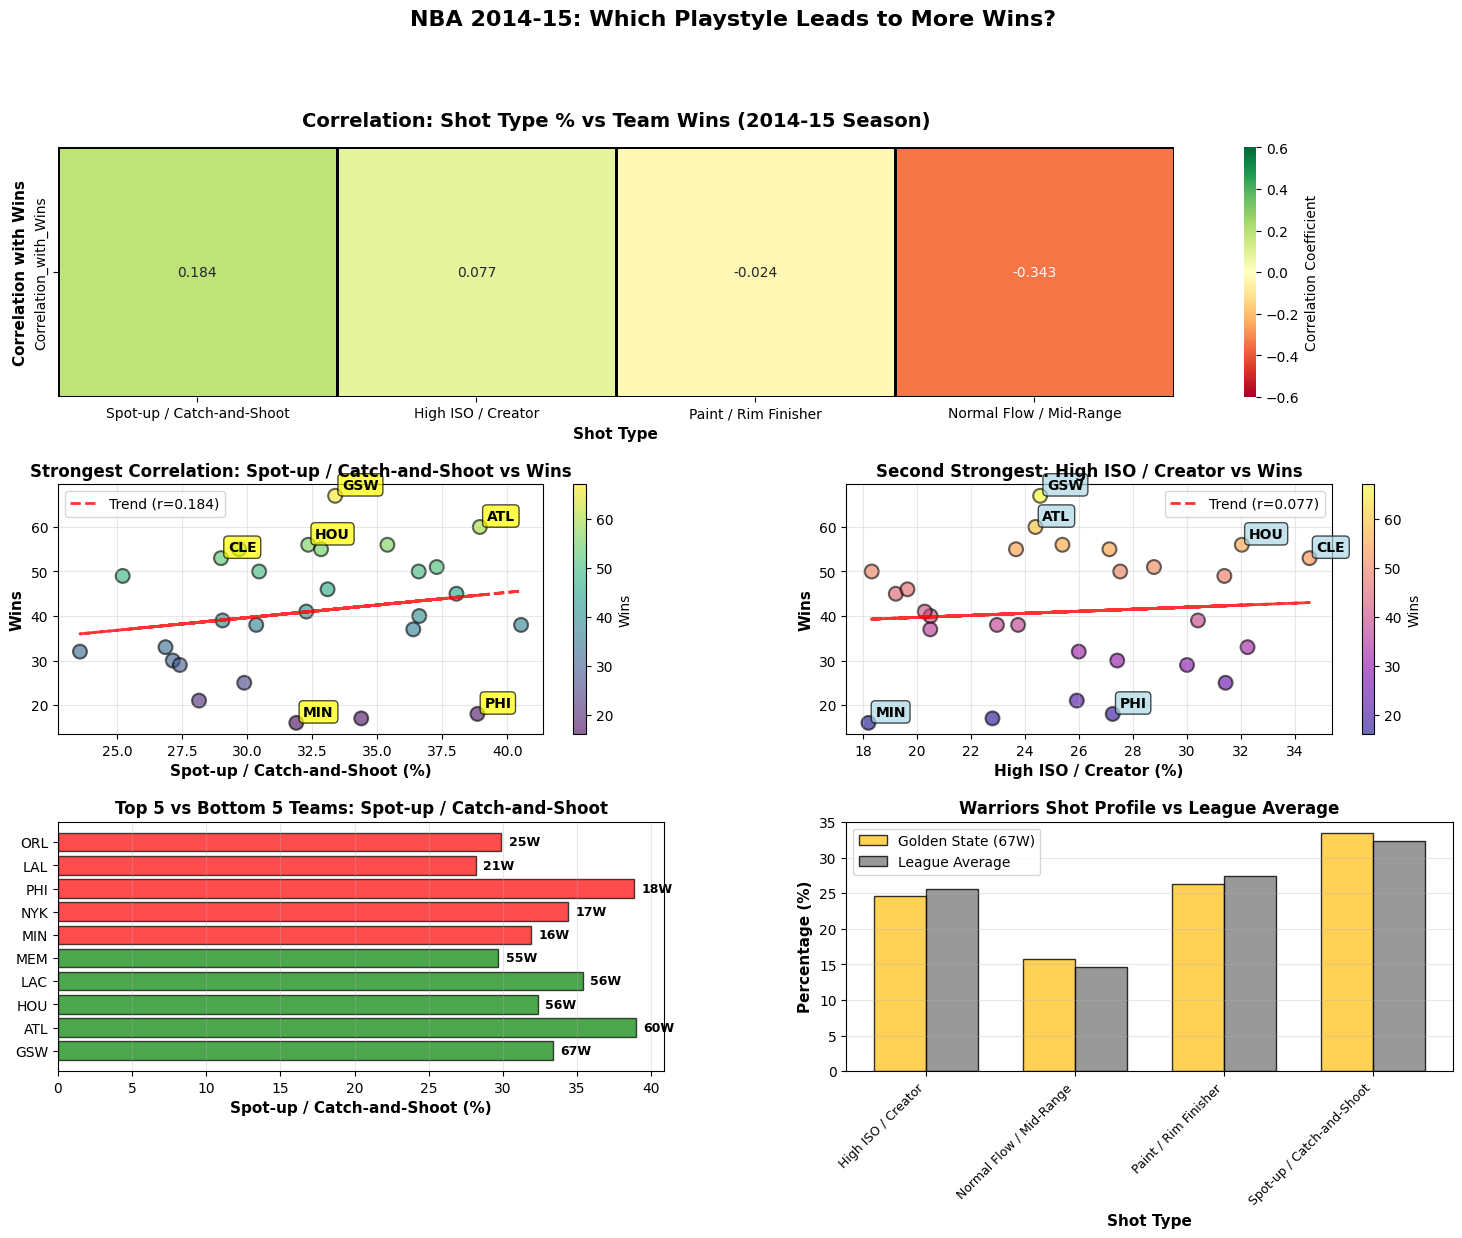


✅ ANALYSIS COMPLETE

KEY FINDINGS:

1. STRONGEST CORRELATION:
   • Spot-up / Catch-and-Shoot: r = 0.184
   • P-value: 0.3494
   • Interpretation: Positive correlation

2. TOP TEAMS' PLAYSTYLE:
   • Golden State Warriors (67W): 33.4% Spot-up / Catch-and-Shoot
   • Atlanta Hawks (60W): 38.9% Spot-up / Catch-and-Shoot
   • Cleveland Cavaliers (53W): 29.0% Spot-up / Catch-and-Shoot

3. ANSWER TO "WHICH PLAYSTYLE LEADS TO MORE WINS?":
   • Teams with MORE Spot-up / Catch-and-Shoot shots tend to WIN MORE
   • Correlation strength: Weak

4. ALL CORRELATIONS (Sorted):
                Shot_Type  Correlation_with_Wins  P_Value
Spot-up / Catch-and-Shoot               0.183694 0.349428
       High ISO / Creator               0.076560 0.698597
     Paint / Rim Finisher              -0.024026 0.903411
  Normal Flow / Mid-Range              -0.343084 0.073879

Dataset saved as: merged_data
Players mapped: 490
Total shots analyzed: 103,753



In [2]:
# ============================================================================
# PLAYSTYLE VS WINS ANALYSIS - USING PLAYER STATISTICS DATASET
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("PLAYSTYLE VS WINS ANALYSIS")
print("="*80)

# ============================================================================
# STEP 0: CREATE TEAM SUCCESS DATASET
# ============================================================================

data = [
    # East Conference
    {'Conference': 'East', 'Rank': 1, 'Team': 'ATL', 'Team_Full': 'Atlanta Hawks', 'Wins': 60, 'Losses': 22},
    {'Conference': 'East', 'Rank': 2, 'Team': 'CLE', 'Team_Full': 'Cleveland Cavaliers', 'Wins': 53, 'Losses': 29},
    {'Conference': 'East', 'Rank': 3, 'Team': 'CHI', 'Team_Full': 'Chicago Bulls', 'Wins': 50, 'Losses': 32},
    {'Conference': 'East', 'Rank': 4, 'Team': 'TOR', 'Team_Full': 'Toronto Raptors', 'Wins': 49, 'Losses': 33},
    {'Conference': 'East', 'Rank': 5, 'Team': 'WAS', 'Team_Full': 'Washington Wizards', 'Wins': 46, 'Losses': 36},
    {'Conference': 'East', 'Rank': 6, 'Team': 'MIL', 'Team_Full': 'Milwaukee Bucks', 'Wins': 41, 'Losses': 41},
    {'Conference': 'East', 'Rank': 7, 'Team': 'BOS', 'Team_Full': 'Boston Celtics', 'Wins': 40, 'Losses': 42},
    {'Conference': 'East', 'Rank': 8, 'Team': 'BKN', 'Team_Full': 'Brooklyn Nets', 'Wins': 38, 'Losses': 44},
    {'Conference': 'East', 'Rank': 9, 'Team': 'IND', 'Team_Full': 'Indiana Pacers', 'Wins': 38, 'Losses': 44},
    {'Conference': 'East', 'Rank': 10, 'Team': 'MIA', 'Team_Full': 'Miami Heat', 'Wins': 37, 'Losses': 45},
    {'Conference': 'East', 'Rank': 11, 'Team': 'CHA', 'Team_Full': 'Charlotte Hornets', 'Wins': 33, 'Losses': 49},
    {'Conference': 'East', 'Rank': 12, 'Team': 'DET', 'Team_Full': 'Detroit Pistons', 'Wins': 32, 'Losses': 50},
    {'Conference': 'East', 'Rank': 13, 'Team': 'ORL', 'Team_Full': 'Orlando Magic', 'Wins': 25, 'Losses': 57},
    {'Conference': 'East', 'Rank': 14, 'Team': 'PHI', 'Team_Full': 'Philadelphia 76ers', 'Wins': 18, 'Losses': 64},
    {'Conference': 'East', 'Rank': 15, 'Team': 'NYK', 'Team_Full': 'New York Knicks', 'Wins': 17, 'Losses': 65},
    
    # West Conference
    {'Conference': 'West', 'Rank': 1, 'Team': 'GSW', 'Team_Full': 'Golden State Warriors', 'Wins': 67, 'Losses': 15},
    {'Conference': 'West', 'Rank': 2, 'Team': 'HOU', 'Team_Full': 'Houston Rockets', 'Wins': 56, 'Losses': 26},
    {'Conference': 'West', 'Rank': 3, 'Team': 'LAC', 'Team_Full': 'Los Angeles Clippers', 'Wins': 56, 'Losses': 26},
    {'Conference': 'West', 'Rank': 4, 'Team': 'POR', 'Team_Full': 'Portland Trail Blazers', 'Wins': 51, 'Losses': 31},
    {'Conference': 'West', 'Rank': 5, 'Team': 'MEM', 'Team_Full': 'Memphis Grizzlies', 'Wins': 55, 'Losses': 27},
    {'Conference': 'West', 'Rank': 6, 'Team': 'SAS', 'Team_Full': 'San Antonio Spurs', 'Wins': 55, 'Losses': 27},
    {'Conference': 'West', 'Rank': 7, 'Team': 'DAL', 'Team_Full': 'Dallas Mavericks', 'Wins': 50, 'Losses': 32},
    {'Conference': 'West', 'Rank': 8, 'Team': 'NOP', 'Team_Full': 'New Orleans Pelicans', 'Wins': 45, 'Losses': 37},
    {'Conference': 'West', 'Rank': 9, 'Team': 'OKC', 'Team_Full': 'Oklahoma City Thunder', 'Wins': 45, 'Losses': 37},
    {'Conference': 'West', 'Rank': 10, 'Team': 'PHO', 'Team_Full': 'Phoenix Suns', 'Wins': 39, 'Losses': 43},
    {'Conference': 'West', 'Rank': 11, 'Team': 'UTA', 'Team_Full': 'Utah Jazz', 'Wins': 38, 'Losses': 44},
    {'Conference': 'West', 'Rank': 12, 'Team': 'DEN', 'Team_Full': 'Denver Nuggets', 'Wins': 30, 'Losses': 52},
    {'Conference': 'West', 'Rank': 13, 'Team': 'SAC', 'Team_Full': 'Sacramento Kings', 'Wins': 29, 'Losses': 53},
    {'Conference': 'West', 'Rank': 14, 'Team': 'LAL', 'Team_Full': 'Los Angeles Lakers', 'Wins': 21, 'Losses': 61},
    {'Conference': 'West', 'Rank': 15, 'Team': 'MIN', 'Team_Full': 'Minnesota Timberwolves', 'Wins': 16, 'Losses': 66}
]

df_wins = pd.DataFrame(data)

print(f"Team Success Dataset Created: {len(df_wins)} teams")

# ============================================================================
# STEP 1: LOAD PLAYER STATISTICS DATASET
# ============================================================================

print("\n" + "="*80)
print("STEP 1: LOADING PLAYER STATISTICS")
print("="*80)

# Assuming your player stats dataset is named 'player_stats'
# If it has a different name, replace it here
print(f"Player Statistics Dataset:")
print(f"  Shape: {player_stats.shape}")
print(f"  Columns: {list(player_stats.columns)}")

# Check team column
print(f"\nUnique teams in player_stats: {player_stats['Team'].nunique()}")
print(f"Teams: {sorted(player_stats['Team'].astype(str).unique())}")
# ============================================================================
# STEP 2: CREATE PLAYER-TO-TEAM MAPPING FROM PLAYER STATS
# ============================================================================

print("\n" + "="*80)
print("STEP 2: CREATING PLAYER-TO-TEAM MAPPING")
print("="*80)

# Create player to team dictionary from player_stats
player_to_team = dict(zip(
    player_stats['Name'].str.lower().str.strip(),
    player_stats['Team']
))

print(f"✓ Created mapping for {len(player_to_team)} players")
print(f"\nSample mappings:")
for i, (player, team) in enumerate(list(player_to_team.items())[:5]):
    print(f"  {player} → {team}")

# ============================================================================
# STEP 3: MAP PLAYERS TO TEAMS IN SHOT DATA
# ============================================================================

print("\n" + "="*80)
print("STEP 3: MAPPING SHOTS TO TEAMS")
print("="*80)

# Normalize player names in shot data
log_shots_pca['player_name_normalized'] = log_shots_pca['player_name'].str.lower().str.strip()

# Map to team
log_shots_pca['Team'] = log_shots_pca['player_name_normalized'].map(player_to_team)

# Check mapping success
mapped_shots = log_shots_pca['Team'].notna().sum()
total_shots = len(log_shots_pca)
unmapped_shots = total_shots - mapped_shots

print(f"✓ Successfully mapped {mapped_shots:,} shots ({mapped_shots/total_shots*100:.1f}%)")
print(f"⚠️  Unmapped shots: {unmapped_shots:,} ({unmapped_shots/total_shots*100:.1f}%)")

# Show which players were not mapped
unmapped_players = log_shots_pca[log_shots_pca['Team'].isna()]['player_name_normalized'].value_counts().head(10)
if len(unmapped_players) > 0:
    print(f"\nTop unmapped players:")
    for player, count in unmapped_players.items():
        print(f"  {player}: {count} shots")

# ============================================================================
# STEP 4: CREATE TEAM SHOT PROFILES
# ============================================================================

print("\n" + "="*80)
print("STEP 4: CREATING TEAM SHOT PROFILES")
print("="*80)

# Filter out unmapped shots
shots_with_teams = log_shots_pca[log_shots_pca['Team'].notna()].copy()

print(f"Using {len(shots_with_teams):,} shots from mapped players")

# Group by team and cluster, count shots
team_cluster_counts = shots_with_teams.groupby(['Team', 'Cluster_Description']).size().reset_index(name='shot_count')

# Calculate total shots per team
team_totals = shots_with_teams.groupby('Team').size().reset_index(name='total_shots')

# Merge and calculate percentages
team_cluster_counts = team_cluster_counts.merge(team_totals, on='Team')
team_cluster_counts['percentage'] = (team_cluster_counts['shot_count'] / team_cluster_counts['total_shots']) * 100

# Pivot to get team shot profiles
team_shot_profiles = team_cluster_counts.pivot(
    index='Team',
    columns='Cluster_Description',
    values='percentage'
).fillna(0)

print(f"✓ Team shot profiles created")
print(f"  Teams with data: {len(team_shot_profiles)}")
print(f"  Clusters tracked: {list(team_shot_profiles.columns)}")

print("\nShots per team:")
print(team_totals.sort_values('total_shots', ascending=False).to_string(index=False))

# ============================================================================
# STEP 5: MERGE WITH WINS DATA
# ============================================================================

print("\n" + "="*80)
print("STEP 5: MERGING WITH TEAM WINS DATA")
print("="*80)

# Merge with wins data (using Team abbreviation)
merged_data = team_shot_profiles.merge(
    df_wins[['Team', 'Team_Full', 'Wins', 'Losses', 'Conference', 'Rank']],
    left_index=True,
    right_on='Team',
    how='inner'
)

print(f"✓ Teams successfully merged: {len(merged_data)}/30")

if len(merged_data) < 30:
    print(f"\n⚠️  Warning: Only {len(merged_data)} teams merged.")
    missing_teams = set(df_wins['Team']) - set(merged_data['Team'])
    if missing_teams:
        print(f"Missing teams: {missing_teams}")

print(f"\nMerged dataset shape: {merged_data.shape}")
print(f"\nFirst few rows:")
print(merged_data[['Team', 'Team_Full', 'Wins', 'Losses']].head(10))

# ============================================================================
# STEP 6: CORRELATION ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("STEP 6: CORRELATION ANALYSIS - PLAYSTYLE VS WINS")
print("="*80)

# Get cluster columns (exclude non-numeric columns)
cluster_columns = [col for col in merged_data.columns 
                  if col not in ['Team', 'Team_Full', 'Wins', 'Losses', 'Conference', 'Rank']]

# Remove 'Unknown' if present
if 'Unknown' in cluster_columns:
    cluster_columns.remove('Unknown')

print(f"Analyzing {len(cluster_columns)} shot types:")
for col in cluster_columns:
    print(f"  • {col}")

# Calculate correlations with Wins
correlations = {}
p_values = {}

for cluster in cluster_columns:
    corr, p_val = pearsonr(merged_data[cluster], merged_data['Wins'])
    correlations[cluster] = corr
    p_values[cluster] = p_val

# Create correlation dataframe
corr_df = pd.DataFrame({
    'Shot_Type': list(correlations.keys()),
    'Correlation_with_Wins': list(correlations.values()),
    'P_Value': list(p_values.values())
}).sort_values('Correlation_with_Wins', ascending=False)

print("\nCorrelation between Shot Types and Wins:")
print("-" * 80)
print(corr_df.to_string(index=False))

# Find strongest correlation
strongest_cluster = corr_df.iloc[0]['Shot_Type']
strongest_corr = corr_df.iloc[0]['Correlation_with_Wins']

print(f"\n🏆 STRONGEST CORRELATION:")
print(f"   {strongest_cluster}: r = {strongest_corr:.3f} (p = {p_values[strongest_cluster]:.4f})")
if abs(strongest_corr) > 0.5:
    print(f"   ✓ Strong correlation!")
elif abs(strongest_corr) > 0.3:
    print(f"   ✓ Moderate correlation")
else:
    print(f"   ⚠️  Weak correlation")

# ============================================================================
# STEP 7: VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("STEP 7: CREATING VISUALIZATIONS")
print("="*80)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.3)

# ============================================================================
# CHART 1: CORRELATION HEATMAP
# ============================================================================

ax1 = fig.add_subplot(gs[0, :])

heatmap_data = corr_df.set_index('Shot_Type')[['Correlation_with_Wins']].T

sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            ax=ax1, cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-0.6, vmax=0.6, linewidths=2, linecolor='black')

ax1.set_title('Correlation: Shot Type % vs Team Wins (2014-15 Season)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('Correlation with Wins', fontsize=11, fontweight='bold')
ax1.set_xlabel('Shot Type', fontsize=11, fontweight='bold')

# ============================================================================
# CHART 2: SCATTER PLOT - STRONGEST CORRELATION
# ============================================================================

ax2 = fig.add_subplot(gs[1, 0])

x = merged_data[strongest_cluster]
y = merged_data['Wins']

scatter = ax2.scatter(x, y, s=100, alpha=0.6, c=merged_data['Wins'], 
                     cmap='viridis', edgecolors='black', linewidth=1.5)

# Add regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax2.plot(x, p(x), "r--", linewidth=2, alpha=0.8, label=f'Trend (r={strongest_corr:.3f})')

# Label specific teams
highlight_teams = ['GSW', 'ATL', 'CLE', 'HOU', 'PHI', 'MIN']

for idx, row in merged_data.iterrows():
    if row['Team'] in highlight_teams:
        ax2.annotate(row['Team'], 
                    (row[strongest_cluster], row['Wins']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax2.set_xlabel(f'{strongest_cluster} (%)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Wins', fontsize=11, fontweight='bold')
ax2.set_title(f'Strongest Correlation: {strongest_cluster} vs Wins', 
              fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.colorbar(scatter, ax=ax2, label='Wins')

# ============================================================================
# CHART 3: SCATTER PLOT - SECOND STRONGEST
# ============================================================================

ax3 = fig.add_subplot(gs[1, 1])

if len(corr_df) > 1:
    second_cluster = corr_df.iloc[1]['Shot_Type']
    second_corr = corr_df.iloc[1]['Correlation_with_Wins']
    
    x2 = merged_data[second_cluster]
    y2 = merged_data['Wins']
    
    scatter2 = ax3.scatter(x2, y2, s=100, alpha=0.6, c=merged_data['Wins'], 
                         cmap='plasma', edgecolors='black', linewidth=1.5)
    
    z2 = np.polyfit(x2, y2, 1)
    p2 = np.poly1d(z2)
    ax3.plot(x2, p2(x2), "r--", linewidth=2, alpha=0.8, label=f'Trend (r={second_corr:.3f})')
    
    for idx, row in merged_data.iterrows():
        if row['Team'] in highlight_teams:
            ax3.annotate(row['Team'], 
                        (row[second_cluster], row['Wins']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=10, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
    
    ax3.set_xlabel(f'{second_cluster} (%)', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Wins', fontsize=11, fontweight='bold')
    ax3.set_title(f'Second Strongest: {second_cluster} vs Wins', 
                  fontsize=12, fontweight='bold')
    ax3.legend(fontsize=10)
    ax3.grid(True, alpha=0.3)
    
    plt.colorbar(scatter2, ax=ax3, label='Wins')

# ============================================================================
# CHART 4: BAR CHART - TOP AND BOTTOM TEAMS
# ============================================================================

ax4 = fig.add_subplot(gs[2, 0])

top_teams = merged_data.nlargest(5, 'Wins')
bottom_teams = merged_data.nsmallest(5, 'Wins')
comparison_teams = pd.concat([top_teams, bottom_teams])

x_pos = np.arange(len(comparison_teams))
bars = ax4.barh(x_pos, comparison_teams[strongest_cluster], 
                color=['green']*5 + ['red']*5, alpha=0.7, edgecolor='black')

ax4.set_yticks(x_pos)
ax4.set_yticklabels(comparison_teams['Team'], fontsize=10)
ax4.set_xlabel(f'{strongest_cluster} (%)', fontsize=11, fontweight='bold')
ax4.set_title(f'Top 5 vs Bottom 5 Teams: {strongest_cluster}', 
              fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

for i, (bar, wins) in enumerate(zip(bars, comparison_teams['Wins'])):
    width = bar.get_width()
    ax4.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{int(wins)}W',
            ha='left', va='center', fontsize=9, fontweight='bold')

# ============================================================================
# CHART 5: SHOT PROFILE COMPARISON
# ============================================================================

ax5 = fig.add_subplot(gs[2, 1])

warriors_data = merged_data[merged_data['Team'] == 'GSW'][cluster_columns].values.flatten()
league_avg = merged_data[cluster_columns].mean().values

x_pos = np.arange(len(cluster_columns))
width = 0.35

bars1 = ax5.bar(x_pos - width/2, warriors_data, width, label='Golden State (67W)',
               color='#FFC72C', alpha=0.8, edgecolor='black')
bars2 = ax5.bar(x_pos + width/2, league_avg, width, label='League Average',
               color='gray', alpha=0.8, edgecolor='black')

ax5.set_xlabel('Shot Type', fontsize=11, fontweight='bold')
ax5.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax5.set_title('Warriors Shot Profile vs League Average', fontsize=12, fontweight='bold')
ax5.set_xticks(x_pos)
ax5.set_xticklabels(cluster_columns, rotation=45, ha='right', fontsize=9)
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3, axis='y')

plt.suptitle('NBA 2014-15: Which Playstyle Leads to More Wins?', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE")
print("="*80)

gsw_value = merged_data[merged_data['Team']=='GSW'][strongest_cluster].values[0]
atl_value = merged_data[merged_data['Team']=='ATL'][strongest_cluster].values[0]
cle_value = merged_data[merged_data['Team']=='CLE'][strongest_cluster].values[0]

print(f"""
KEY FINDINGS:

1. STRONGEST CORRELATION:
   • {strongest_cluster}: r = {strongest_corr:.3f}
   • P-value: {p_values[strongest_cluster]:.4f}
   • Interpretation: {'Positive' if strongest_corr > 0 else 'Negative'} correlation

2. TOP TEAMS' PLAYSTYLE:
   • Golden State Warriors (67W): {gsw_value:.1f}% {strongest_cluster}
   • Atlanta Hawks (60W): {atl_value:.1f}% {strongest_cluster}
   • Cleveland Cavaliers (53W): {cle_value:.1f}% {strongest_cluster}

3. ANSWER TO "WHICH PLAYSTYLE LEADS TO MORE WINS?":
   • {'Teams with MORE ' + strongest_cluster + ' shots tend to WIN MORE' if strongest_corr > 0 else 'Teams with FEWER ' + strongest_cluster + ' shots tend to WIN MORE'}
   • Correlation strength: {'Strong' if abs(strongest_corr) > 0.5 else 'Moderate' if abs(strongest_corr) > 0.3 else 'Weak'}

4. ALL CORRELATIONS (Sorted):
{corr_df.to_string(index=False)}

Dataset saved as: merged_data
Players mapped: {len(player_to_team):,}
Total shots analyzed: {len(shots_with_teams):,}
""")

# sonraki analizler neyi yapabilrim 
# ben toplam shotslara baktim kim nerden sayilari sokmus '1' buna gore bu grafigi tekrar analiz edebilrim
# decision tree ile bir analiz yapabilrim cogu kisi oyle yapcak
# decision tree yap bence bu analizleri cunku pcaleri boyle kullanabilir miyim bilmiyorum.


STEP 7: CREATING VISUALIZATIONS


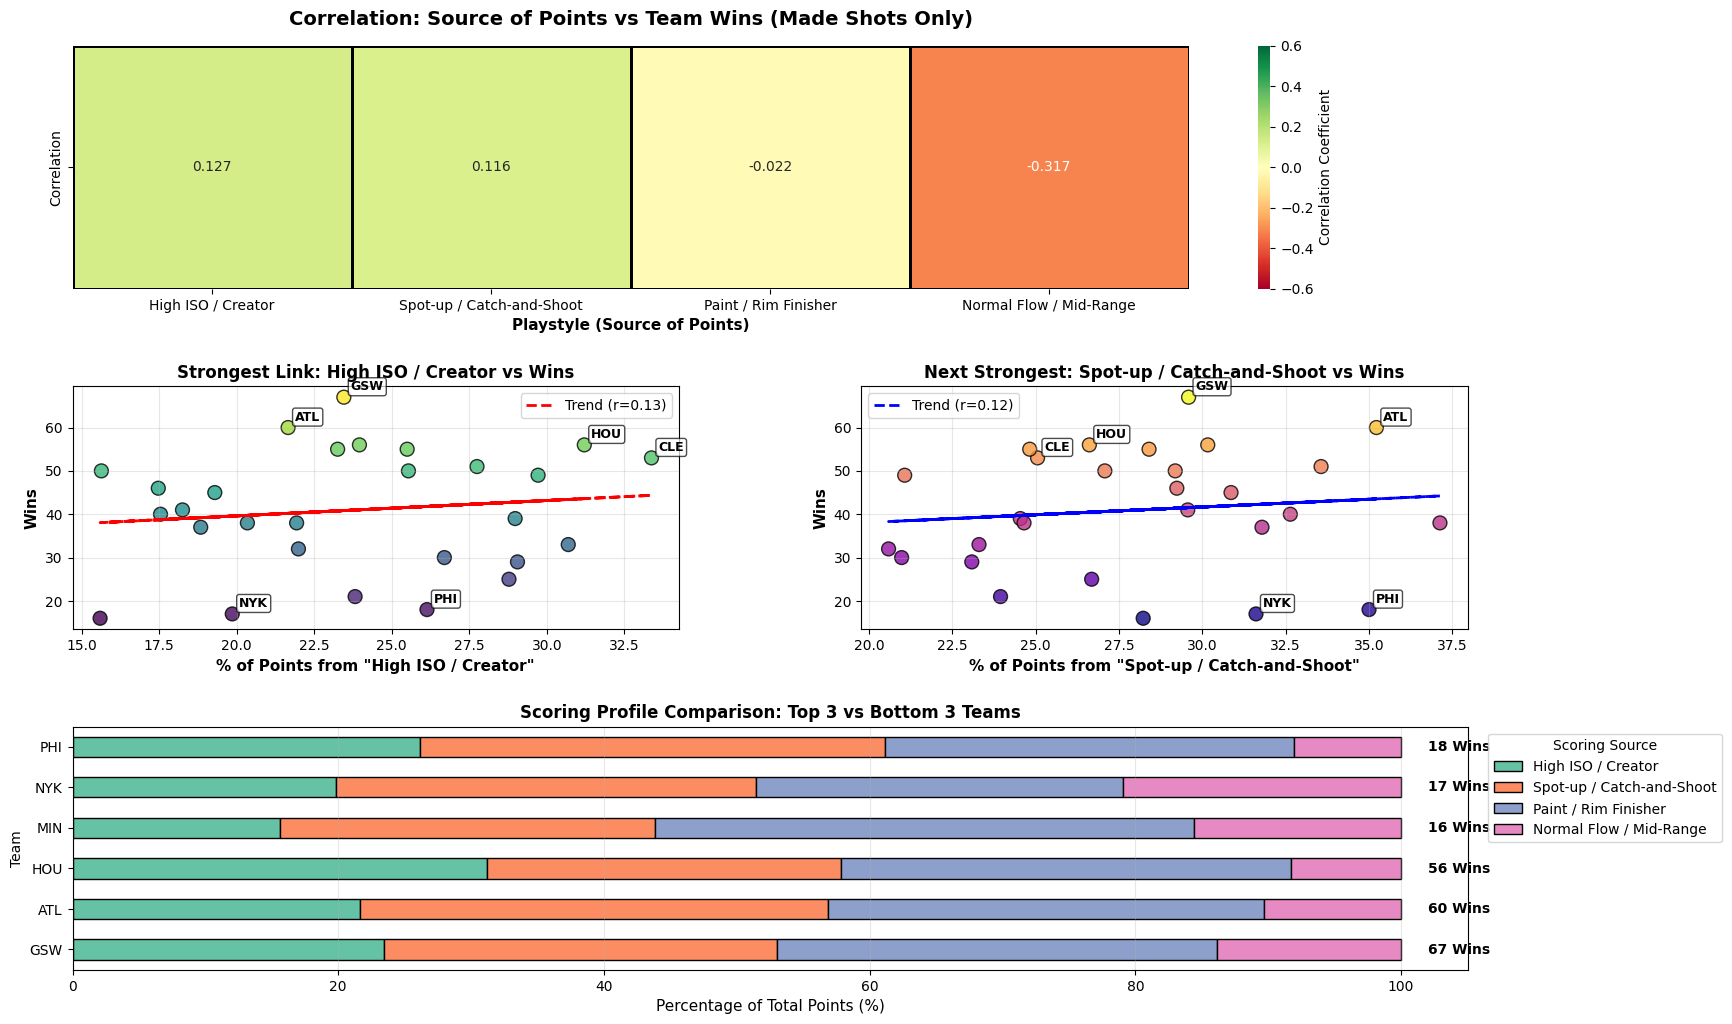

In [11]:
# ============================================================================
# STEP 7: VISUALIZATION (CORRECTED)
# ============================================================================

print("\n" + "="*80)
print("STEP 7: CREATING VISUALIZATIONS")
print("="*80)

# Create layout
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

# ----------------------------------------------------------------------------
# CHART 1: HEATMAP (Fixed Column Names)
# ----------------------------------------------------------------------------
ax1 = fig.add_subplot(gs[0, :])

# DÜZELTME: 'shot_type' yerine 'Playstyle', 'Correlation_with_Wins' yerine 'Correlation'
heatmap_data = corr_df.set_index('Playstyle')[['Correlation']].T

sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            ax=ax1, cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-0.6, vmax=0.6, linewidths=2, linecolor='black')

ax1.set_title('Correlation: Source of Points vs Team Wins (Made Shots Only)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Playstyle (Source of Points)', fontsize=11, fontweight='bold')

# ----------------------------------------------------------------------------
# CHART 2: SCATTER PLOT (Strongest Correlation)
# ----------------------------------------------------------------------------
ax2 = fig.add_subplot(gs[1, 0])

# Strongest comes from index 0 of sorted corr_df
strongest_style = corr_df.iloc[0]['Playstyle']
strongest_val = corr_df.iloc[0]['Correlation']

x = merged_data[strongest_style]
y = merged_data['Wins']

# Scatter with Win-based coloring
scatter = ax2.scatter(x, y, c=merged_data['Wins'], cmap='viridis', s=100, edgecolors='black', alpha=0.8)

# Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax2.plot(x, p(x), "r--", linewidth=2, label=f'Trend (r={strongest_val:.2f})')

# Label Key Teams
highlight_teams = ['GSW', 'ATL', 'CLE', 'HOU', 'PHI', 'NYK']
for idx, row in merged_data.iterrows():
    if row['Team'] in highlight_teams:
        ax2.annotate(row['Team'], 
                     (row[strongest_style], row['Wins']),
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=9, fontweight='bold',
                     bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

ax2.set_xlabel(f'% of Points from "{strongest_style}"', fontsize=11, fontweight='bold')
ax2.set_ylabel('Wins', fontsize=11, fontweight='bold')
ax2.set_title(f'Strongest Link: {strongest_style} vs Wins', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# ----------------------------------------------------------------------------
# CHART 3: SCATTER PLOT (Second Strongest or Negative)
# ----------------------------------------------------------------------------
ax3 = fig.add_subplot(gs[1, 1])

if len(corr_df) > 1:
    # Let's verify if we have a second one
    second_style = corr_df.iloc[1]['Playstyle']
    second_val = corr_df.iloc[1]['Correlation']
    
    x2 = merged_data[second_style]
    y2 = merged_data['Wins']
    
    scatter2 = ax3.scatter(x2, y2, c=merged_data['Wins'], cmap='plasma', s=100, edgecolors='black', alpha=0.8)
    
    # Trendline
    z2 = np.polyfit(x2, y2, 1)
    p2 = np.poly1d(z2)
    ax3.plot(x2, p2(x2), "b--", linewidth=2, label=f'Trend (r={second_val:.2f})')
    
    # Label Key Teams
    for idx, row in merged_data.iterrows():
        if row['Team'] in highlight_teams:
            ax3.annotate(row['Team'], 
                         (row[second_style], row['Wins']),
                         xytext=(5, 5), textcoords='offset points',
                         fontsize=9, fontweight='bold',
                         bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

    ax3.set_xlabel(f'% of Points from "{second_style}"', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Wins', fontsize=11, fontweight='bold')
    ax3.set_title(f'Next Strongest: {second_style} vs Wins', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend()

# ----------------------------------------------------------------------------
# CHART 4: TOP vs BOTTOM TEAMS COMPARISON
# ----------------------------------------------------------------------------
ax4 = fig.add_subplot(gs[2, :])

# Get Top 3 and Bottom 3 Teams based on Wins
top_3 = merged_data.nlargest(3, 'Wins')
bottom_3 = merged_data.nsmallest(3, 'Wins')
comparison = pd.concat([top_3, bottom_3])

# Prepare data for stacked bar
styles = corr_df['Playstyle'].tolist()
colors = sns.color_palette("Set2", len(styles))

comparison.set_index('Team')[styles].plot(kind='barh', stacked=True, ax=ax4, color=colors, edgecolor='black')

ax4.set_title(f'Scoring Profile Comparison: Top 3 vs Bottom 3 Teams', fontsize=12, fontweight='bold')
ax4.set_xlabel('Percentage of Total Points (%)', fontsize=11)
ax4.legend(title='Scoring Source', bbox_to_anchor=(1.01, 1), loc='upper left')
ax4.grid(axis='x', alpha=0.3)

# Add Win counts to bars
for i, (idx, row) in enumerate(comparison.iterrows()):
    ax4.text(102, i, f"{int(row['Wins'])} Wins", va='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()